In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [34]:
data = pd.read_csv('3.12. Example.csv')
data.head(2)

,Satisfaction,Fréquence d’achats par mois
0,4,0.47
1,6,1.52


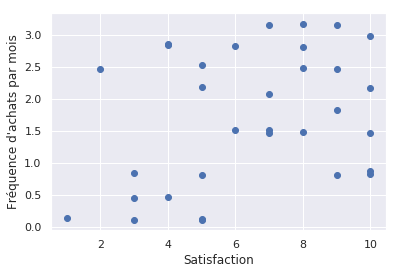

In [20]:
plt.scatter(data['Satisfaction'], data['Fréquence d’achats par mois'])
plt.xlabel('Satisfaction')
plt.ylabel("Fréquence d'achats par mois")
plt.show()

In [21]:
x = data.copy()

In [22]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

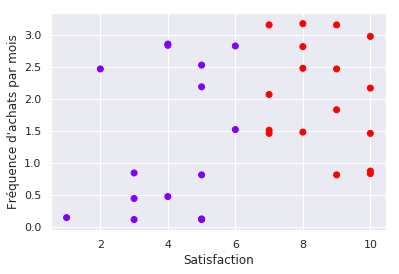

In [24]:
plt.scatter(clusters['Satisfaction'], clusters['Fréquence d’achats par mois'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()

In [25]:
#Problem: Satisfaction is choosen as the main feature
#Standardizing the variables

In [27]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

/home/sihihi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.95472199, -1.22212764],
       [-0.18127633, -0.19502687],
       [-0.56799916, -0.88954263],
       [ 0.2054465 , -0.20480878],
       [-0.95472199,  1.11574935],
       [-2.11489049, -1.54493074],
       [ 1.365615  , -0.8699788 ],
       [ 0.59216934, -0.23415452],
       [ 0.59216934,  1.0766217 ],
       [ 0.59216934,  0.74403669],
       [ 1.365615  , -0.25371834],
       [-0.56799916,  0.46036124],
       [-0.56799916, -1.57427647],
       [-1.72816766,  0.73425477],
       [ 0.2054465 ,  0.34297829],
       [ 0.97889217,  1.40920671],
       [ 0.59216934,  1.42877053],
       [ 0.2054465 ,  1.40920671],
       [ 0.2054465 , -0.25371834],
       [ 0.97889217,  0.73425477],
       [ 1.365615  ,  1.23313229],
       [-1.34144483, -1.57427647],
       [-0.95472199,  1.09618552],
       [-1.34144483, -0.86019689],
       [-0.18127633,  1.08640361],
       [ 0.97889217, -0.88954263],
       [ 1.365615  ,  0.44079741],
       [ 0.97889217,  0.1082124 ],
       [-1.34144483,

In [28]:
#The elbow method

In [39]:
wcss = []

for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[64.0,
 32.184843623105856,
 19.327081177321023,
 11.209035651151233,
 8.135047488093399,
 6.620759832134734,
 5.46851591785286,
 4.3449863972107305,
 3.876728774971974,
 3.225114001867807,
 2.933814716941016,
 2.5358848863832613,
 2.240314624778339,
 1.82912260231178,
 1.5933432741982716,
 1.4471675537155657,
 1.2171672342572082,
 0.967573964298134,
 0.8911515247201058,
 0.750622548848431,
 0.5614624441196956,
 0.441091277561414,
 0.3396021096004882,
 0.23988312900806444,
 0.1649144826818038,
 0.109608088141576,
 0.054301693601348226,
 0.0022007734851647773,
 0.0010047009388795733]

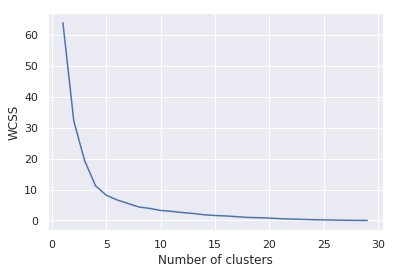

In [40]:
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Fréquence d’achats par mois,cluster_pred
0,4,0.47,0
1,6,1.52,1
2,5,0.81,0
3,7,1.51,1
4,4,2.86,2
5,1,0.14,0
6,10,0.83,1
7,8,1.48,1
8,8,2.82,3
9,8,2.48,3


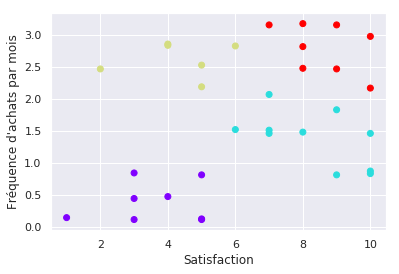

In [32]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Fréquence d’achats par mois'], c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()